<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826041 sha256=fe8fc02c5e6c8bb585b2fe5d3f86482db4d0279b9c26c549646952e951894571
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436294 sha256=e8972bad2332f7dca48f611fd90d37089a51d11d4335cbf027307861726b4672
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [354]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-LINK", interval="minute15", count=410)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                        open     high      low    close        volume  \
2023-04-18 02:30:00  10680.0  10690.0  10630.0  10630.0   4583.741097   
2023-04-18 02:45:00  10640.0  10670.0  10640.0  10660.0   1417.097763   
2023-04-18 03:00:00  10660.0  10700.0  10650.0  10700.0    742.785187   
2023-04-18 03:15:00  10700.0  10720.0  10700.0  10700.0    978.667316   
2023-04-18 03:30:00  10680.0  10710.0  10680.0  10710.0    962.404481   
...                      ...      ...      ...      ...           ...   
2023-04-22 09:00:00   9490.0   9530.0   9480.0   9520.0  10506.766624   
2023-04-22 09:15:00   9530.0   9540.0   9500.0   9505.0  13622.867441   
2023-04-22 09:30:00   9510.0   9510.0   9475.0   9485.0   6399.578393   
2023-04-22 09:45:00   9485.0   9485.0   9425.0   9435.0  12307.574786   
2023-04-22 10:00:00   9440.0   9450.0   9435.0   9435.0   2670.941843   

                            value  
2023-04-18 02:30:00  4.893431e+07  
2023-04-18 02:45:00  1.509644e+07  
2023-04-18 03:0

In [355]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-18 02:30:00,10630.0
1,2023-04-18 02:45:00,10660.0
2,2023-04-18 03:00:00,10700.0
3,2023-04-18 03:15:00,10700.0
4,2023-04-18 03:30:00,10710.0
...,...,...
410,2023-04-22 09:00:00,9520.0
411,2023-04-22 09:15:00,9505.0
412,2023-04-22 09:30:00,9485.0
413,2023-04-22 09:45:00,9435.0


In [356]:
#prophet 불러옴
from fbprophet import Prophet

In [357]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [358]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


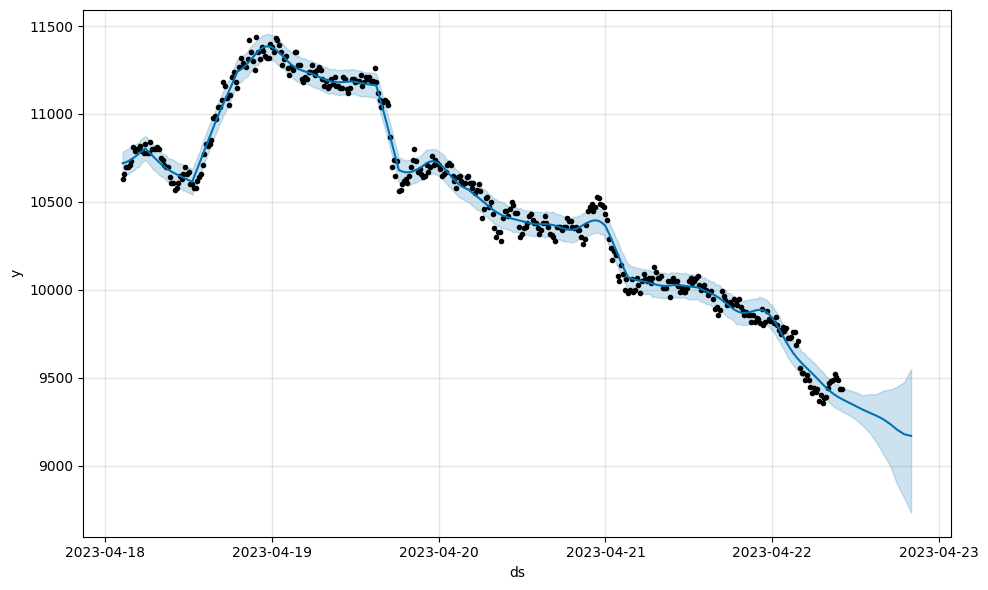

In [359]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


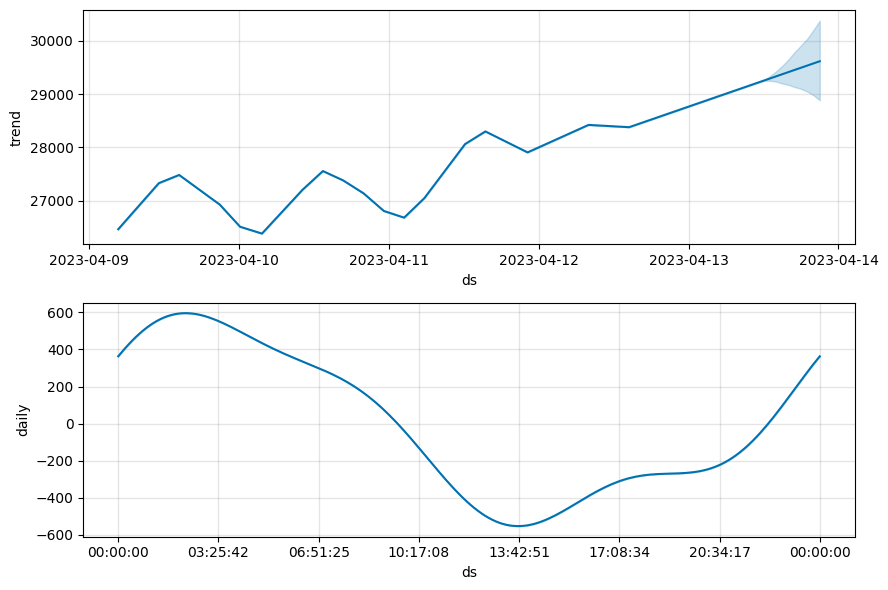

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored